In [16]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (15,9)

# Product Details csv file Analysis

In [17]:
# Read the product details csv file
product_details = pd.read_csv("ProductDetails.csv")

In [18]:
# function to extract the brand name from a product name
def extract_brand_name(product_name):
    words = product_name.split()
    return ' '.join(words[:2])

In [19]:
# Apply the function to the Product Name column to create a new Brand Name column
product_details['Brand Name'] = product_details['Name'].apply(extract_brand_name)

In [20]:
product_details.head()

,URL,Name,Disc-Price,Original-Price,Star,Total-Review,Brand Name
0,/collections/disposable-vaporizers/products/7-...,7 Daze Ohmlet 7000 Puffs Rechargeable Disposab...,15.99,29.99,5.0,47,7 Daze
1,/collections/disposable-vaporizers/products/yo...,Yogi Bar 8K 8000 Puffs Disposable Vape - 17ML,16.99,20.99,0.0,0,Yogi Bar
2,/collections/disposable-vaporizers/products/bi...,HorizonTech Binaries 6K 6000 Puffs Disposable ...,14.99,19.99,3.9,16,HorizonTech Binaries
3,/collections/disposable-vaporizers/products/el...,ELF BAR TE5000 5000 Puffs Silent Disposable Va...,15.99,19.99,4.7,18,ELF BAR
4,/collections/disposable-vaporizers/products/el...,ELF BAR BC5000 5000 Puffs Disposable Vape - 13ML,15.99,19.99,4.9,168,ELF BAR


# Brand Analysis of Products

In [21]:
# Calculate the discount percentage for each product
product_details['Discount %'] = (product_details['Original-Price'] - product_details['Disc-Price']) /product_details['Original-Price'] * 100

# Calculate the average discount percentage across all products
avg_discount_pct = product_details['Discount %'].mean()

# Print the results
print("Average discount percentage for all Disposable products: {:.2f}%".format(avg_discount_pct))

Average discount percentage for all Disposable products: 40.58%


In [22]:
# Calculate the average discount price for each brand
brand_discounts = product_details.groupby('Brand Name')['Discount %'].mean().reset_index()

# sort the values in descending order
brand_discounts_sorted = brand_discounts.sort_values(by='Discount %',ascending=False)

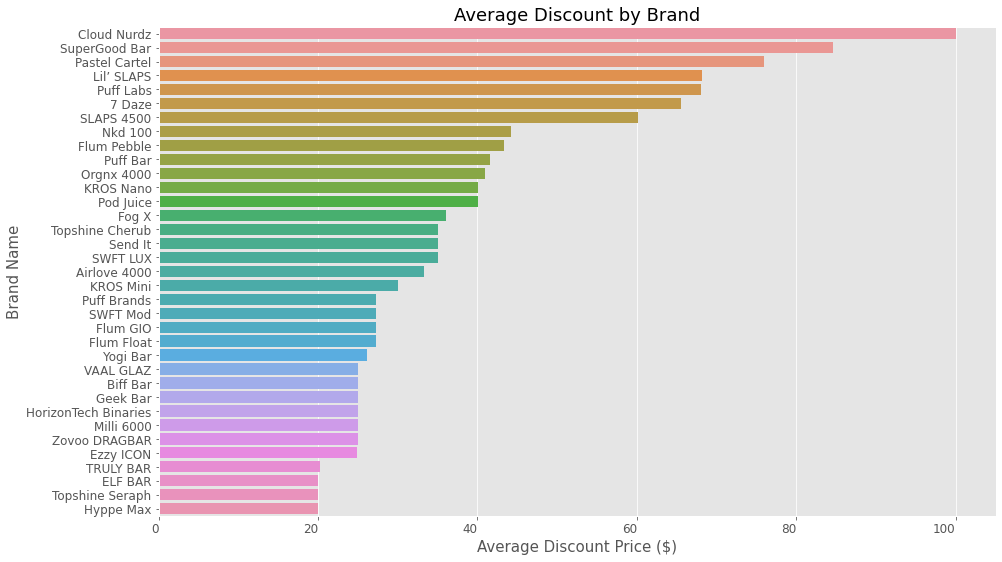

In [23]:
# Create the plot using Seaborn
sns.barplot(x='Discount %',y='Brand Name', data=brand_discounts_sorted)
plt.title('Average Discount by Brand', fontsize=18)
plt.xlabel('Average Discount Price ($)', fontsize=15)
plt.ylabel('Brand Name', fontsize=15)
plt.xticks(ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [24]:
# calculate average discount prices for each Brand
competitor_prices = product_details.groupby('Brand Name')['Disc-Price'].mean().reset_index()

# sort the values in descending order
competitor_prices_sorted = competitor_prices.sort_values(by='Disc-Price',ascending=False)

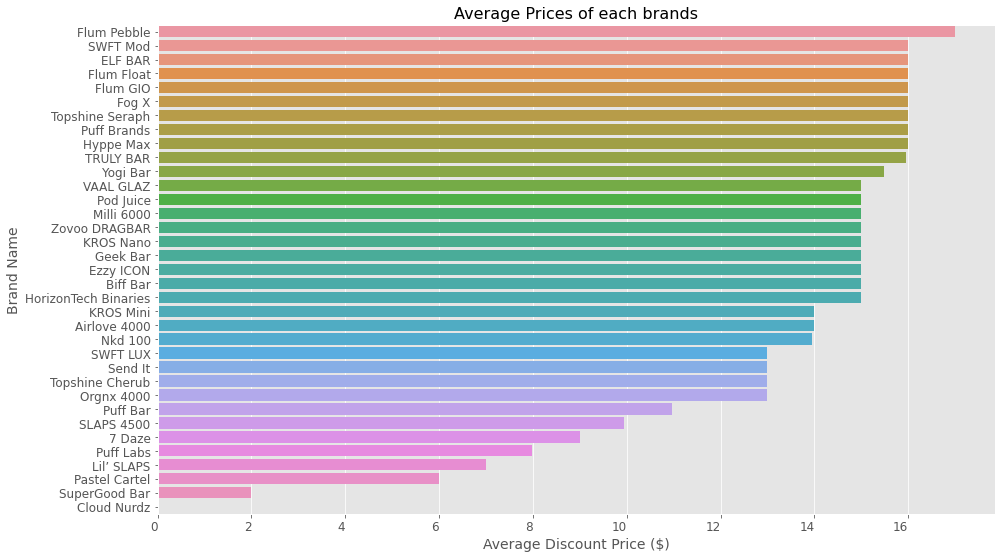

In [25]:
# Create the plot using Seaborn
sns.barplot(x='Disc-Price',y='Brand Name', data=competitor_prices_sorted)
plt.title('Average Prices of each brands', fontsize=16)
plt.xlabel('Average Discount Price ($)', fontsize=14)
plt.ylabel('Brand Name', fontsize=14)
plt.xticks(ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
# calculate average ratings for each Brand
competitor_ratings = product_details.groupby('Brand Name')['Star'].mean().reset_index()

# sort the values in descending order
competitor_ratings_sorted = competitor_ratings.sort_values(by='Star',ascending=False)

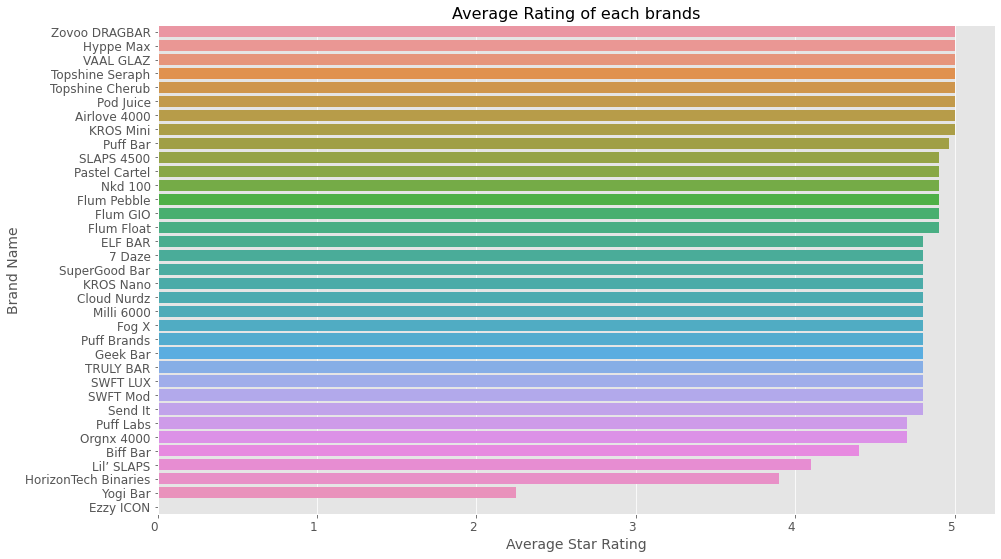

In [27]:
# Create the plot using Seaborn
sns.barplot(x='Star', y='Brand Name', data=competitor_ratings_sorted)
plt.title('Average Rating of each brands', fontsize=16)
plt.xlabel('Average Star Rating', fontsize=14)
plt.ylabel('Brand Name', fontsize=14)
plt.xticks( ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Get the top 10 products with the highest total reviews

In [29]:
# Calculate the average total reviews for each product
product_performance = product_details.groupby('Name').agg({'Total-Review': 'sum'}).reset_index()
Top10products = product_performance.nlargest(10,'Total-Review')
Top10products

,Name,Total-Review
32,SWFT Mod 5000 Puffs Rechargeable Disposable Va...,248
9,Flum Float 3000 Puffs Disposable Vape - 8ML,206
6,ELF BAR BC5000 5000 Puffs Disposable Vape - 13ML,168
34,SuperGood Bar Disposable Vaporizer - 1.4ML,166
11,Flum Pebble 6000 Puffs Rechargeable Disposable...,120
1,7 Daze Ohmlet 7000 Puffs Rechargeable Disposab...,47
0,7 Daze Egge 3000 Puffs Rechargeable Disposable...,44
12,Fog X Box 6000 Puffs Disposable Vaporizer - 13ML,41
10,Flum GIO 3000 Puffs Disposable Vape Bar - 8ML,37
19,Milli 6000 Puffs Premium Disposable Vape - 14ML,37


# Price Analysis of Products

In [30]:
# calculate the mean, median, and standard deviation of the original prices
orig_mean = product_details['Original-Price'].mean()
orig_median = product_details['Original-Price'].median()
orig_std = product_details['Original-Price'].std()

# calculate the mean, median, and standard deviation of the discount prices
disc_mean = product_details['Disc-Price'].mean()
disc_median = product_details['Disc-Price'].median()
disc_std = product_details['Disc-Price'].std()

# print the statistics
print('Original Price:')
print(f'Mean: {orig_mean:.2f}, Median: {orig_median:.2f}, Std Dev: {orig_std:.2f}')
print('Discount Price:')
print(f'Mean: {disc_mean:.2f}, Median: {disc_median:.2f}, Std Dev: {disc_std:.2f}')

Original Price:
Mean: 21.11, Median: 19.99, Std Dev: 3.73
Discount Price:
Mean: 12.75, Median: 14.99, Std Dev: 4.72


We can see that the mean discount price is lower than the mean original price, which suggests that customers are responding well to discounts.

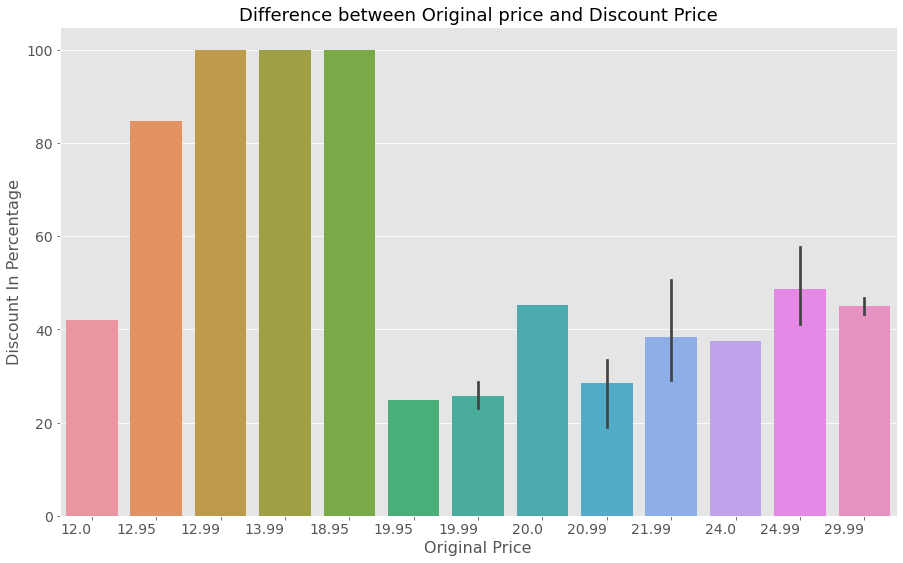

In [43]:
# Create the plot using Seaborn
sns.barplot(x='Original-Price', y='Discount %', data=product_details)
plt.title('Difference between Original price and Discount Price', fontsize=18)
plt.xlabel('Original Price', fontsize=16)
plt.ylabel('Discount In Percentage', fontsize=16)
plt.xticks( ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Based on above graph we can say that Original price between 12.99 to 18.95 has higher Discount Rate. Higher Original price has low discount rate.

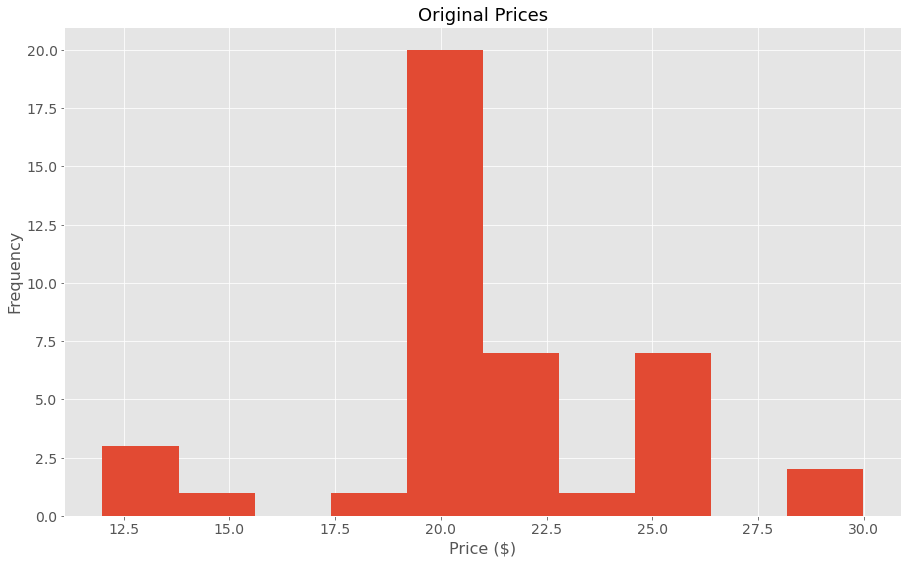

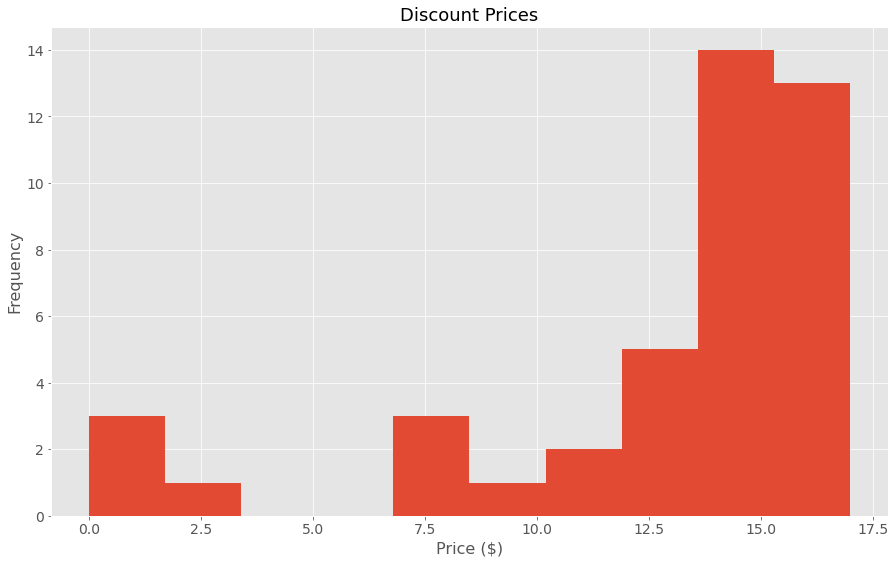

In [53]:
# plot a histogram of the original prices
plt.hist(product_details['Original-Price'], bins=10)
plt.title('Original Prices',fontsize=18)
plt.xlabel('Price ($)',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# plot a histogram of the discount prices
plt.hist(product_details['Disc-Price'], bins=10)
plt.title('Discount Prices',fontsize=18)
plt.xlabel('Price ($)',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From the histograms, we can see that most products original priced between 17 to 25. 

Most Discount price range between 10 to 17.

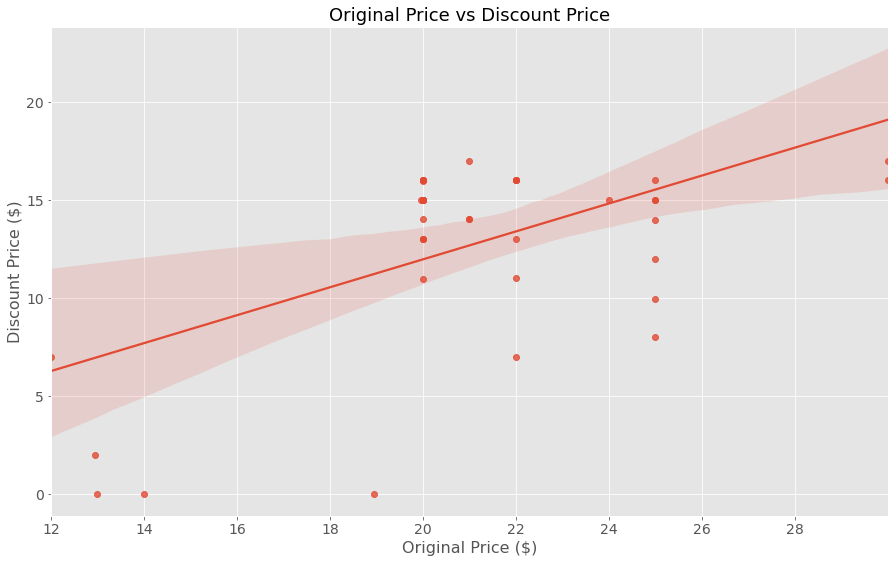

In [54]:
# create a scatter plot of original price vs discount price
sns.regplot(x='Original-Price', y='Disc-Price', data=product_details)
plt.title('Original Price vs Discount Price',fontsize=18)
plt.xlabel('Original Price ($)',fontsize=16)
plt.ylabel('Discount Price ($)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Product Description csv file Analysis

In [55]:
# Read csv file
product_specification = pd.read_csv("ProductDeSpRe.csv")

In [56]:
product_specification.head()

,Description,Specification,Review
0,\nBlueberry Peach: Blueberry Infused Peach\nIc...,"Lightweight, Small, and PortableInternal Batte...",Great flavor and last a long time Good qual...
1,\nAloe Grape: The classic combination of aloe ...,5% Tobacco-Free Nicotine15ml E-Liquid650mAh Ba...,Love how long it last and the flavor quality...
2,Apple PeachBlueberry IceBlue Razz IceBlue Razz...,5% Salt Nicotine13.5ml E-Liquid550mAh BatteryU...,Vapor DNA is always consistent with my order...
3,Strawberry KiwiKiwi Passionfruit GuavaWatermel...,5% Tobacco-Free Nicotine13ml E-Liquid650mAh Ba...,Last forever This is my most favorite flavo...
4,Aloe GrapeBlack IceBlue Slushee IceClearGummyI...,"Lightweight, Small, and Portable700mAh Interna...",Great flavor and they include a charge cable...


In [57]:
# Perform sentiment analysis on the reviews
product_specification['Sentiment'] = product_specification['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

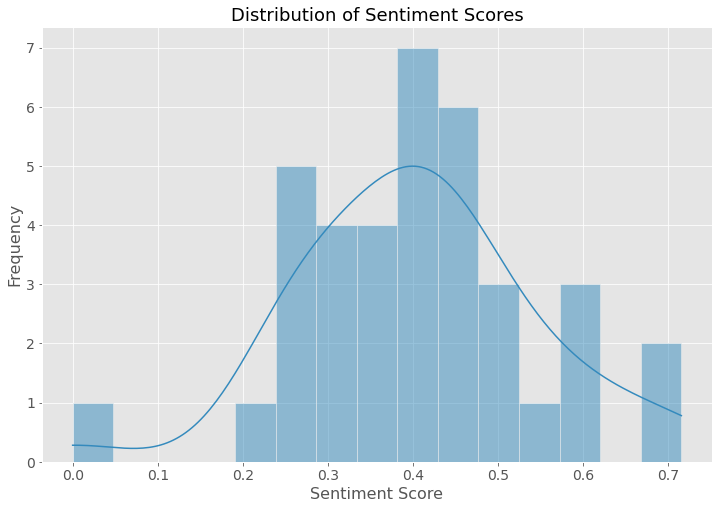

In [58]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(12,8))
sns.histplot(product_specification['Sentiment'], bins=15, kde=True)
plt.title('Distribution of Sentiment Scores',fontsize=18)
plt.xlabel('Sentiment Score',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Based on sentiment analysis we got distribution polarity rate between 0.3 to 0.5.
0 to 1 :- Positive Review,
0 :- Neutral Review,
0 to -1 :- Negative Review
Based on over polarity score review is positive.

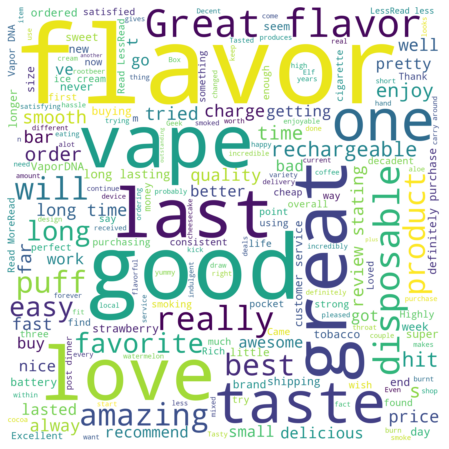

In [42]:
# Concatenate all reviews into a single string
reviews_text = ' '.join(product_specification['Review'])

# Generate a word cloud of the most common words in the reviews
wordcloud = WordCloud(width=1500, height=1500, background_color='white').generate(reviews_text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()